# Image Processing Lab 3  
Dr. Amr Amin  
Ahmed Alqassas  
Autumn 2024-25  

# **Hands-on** Image Negative
The negative of an image with intensity levels in the range [0,L − 1] is obtained by using the negative transformation function which has the form: $s=L-1-r$
Where $L$ is the number of intensity levels used to represent the image: $L = 2^{Bit-depth}$

datatype: uint8


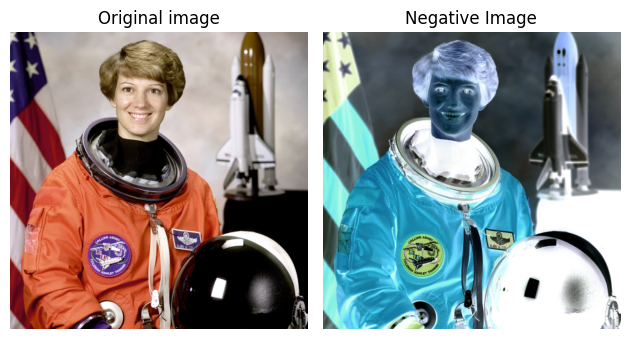

In [3]:
from skimage import data
import matplotlib.pyplot as plt

# Import a built-in image
im = data.astronaut()
print(f'datatype: {im.dtype}')
# Calculate the negativ intensities
negim = 255 - im

# Plotting
figure, ax = plt.subplots(1, 2)

# Plot first Image
ax[0].imshow(im)
ax[0].set_title('Original image')
ax[0].axis('off')

# Plot second Image
ax[1].imshow(negim)
ax[1].set_title('Negative Image')
ax[1].axis('off')


figure.tight_layout()
plt.show()

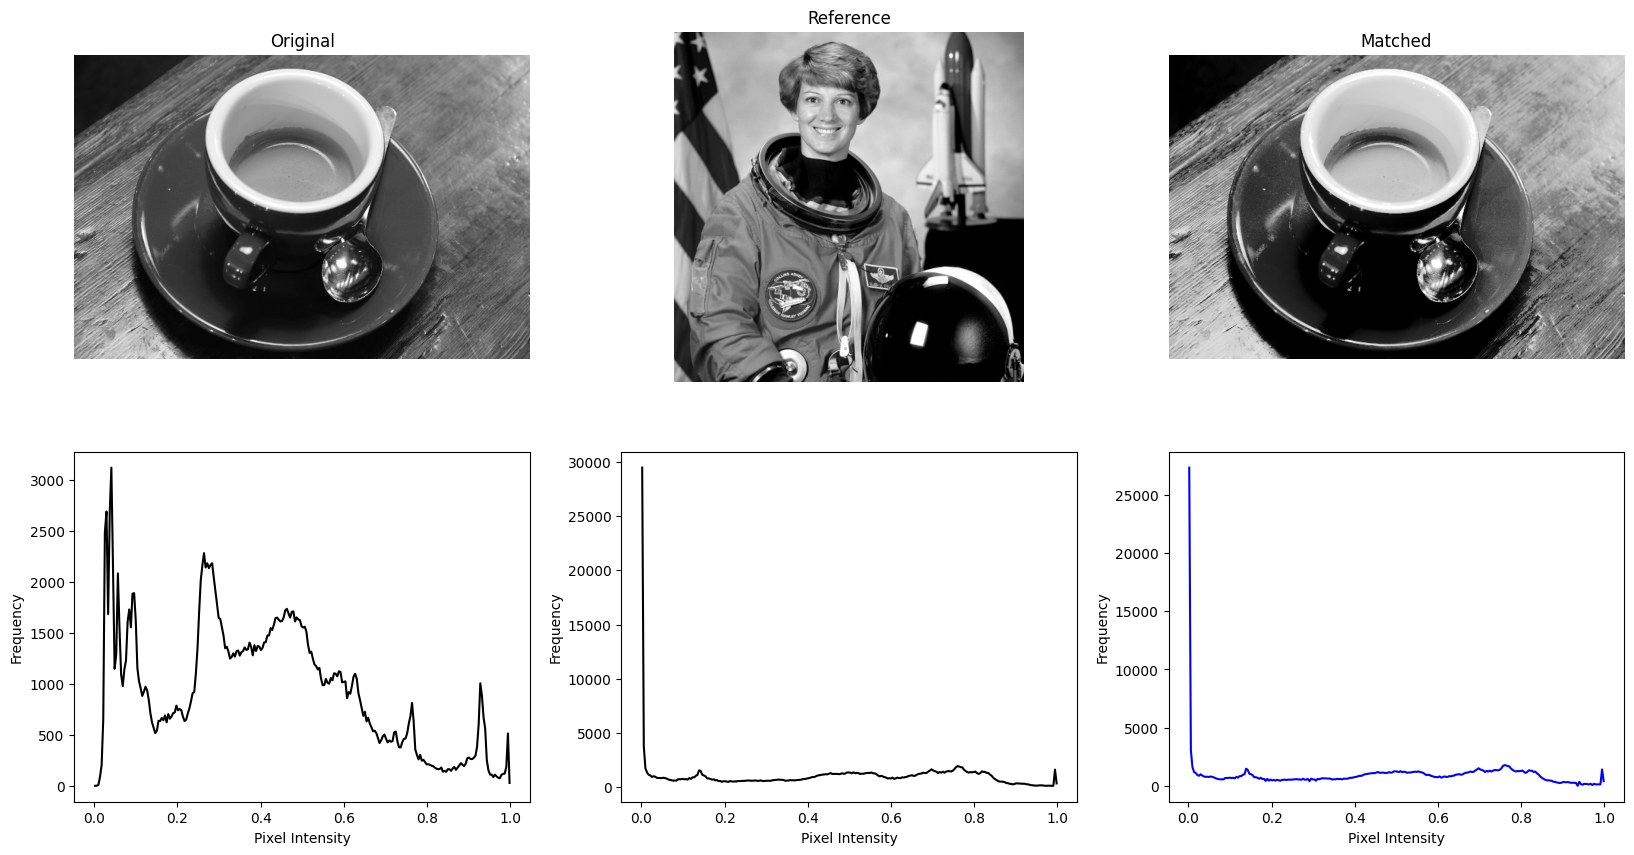

In [4]:
from skimage import data, exposure, color
import matplotlib.pyplot as plt

image = color.rgb2gray(data.coffee())
reference = color.rgb2gray(data.astronaut())
matched = exposure.match_histograms(image, reference)

# Compute histogram
hist1, hist_bins1 = exposure.histogram(image)
hist2, hist_bins2 = exposure.histogram(reference)
hist3, hist_bins3 = exposure.histogram(matched)

# Plotting
fig, ax = plt.subplots(2,3, figsize=(20, 10))

#  Original Image
ax[0,0].imshow(image, cmap='gray')
ax[0,0].set_title("Original")
ax[0,0].axis('off')

#  Ref Image
ax[0,1].imshow(reference, cmap='gray')
ax[0,1].set_title("Reference")
ax[0,1].axis('off')

# Matched Image
ax[0,2].imshow(matched, cmap='gray')
ax[0,2].set_title("Matched")
ax[0,2].axis('off')

ax[1,0].plot(hist_bins1, hist1, color='k', label='Histogram')
ax[1,0].set_xlabel("Pixel Intensity")
ax[1,0].set_ylabel("Frequency")

ax[1,1].plot(hist_bins2, hist2, color='k', label='Histogram')
ax[1,1].set_xlabel("Pixel Intensity")
ax[1,1].set_ylabel("Frequency")

ax[1,2].plot(hist_bins3, hist3, color='b', label='Histogram')
ax[1,2].set_xlabel("Pixel Intensity")
ax[1,2].set_ylabel("Frequency")


plt.show()

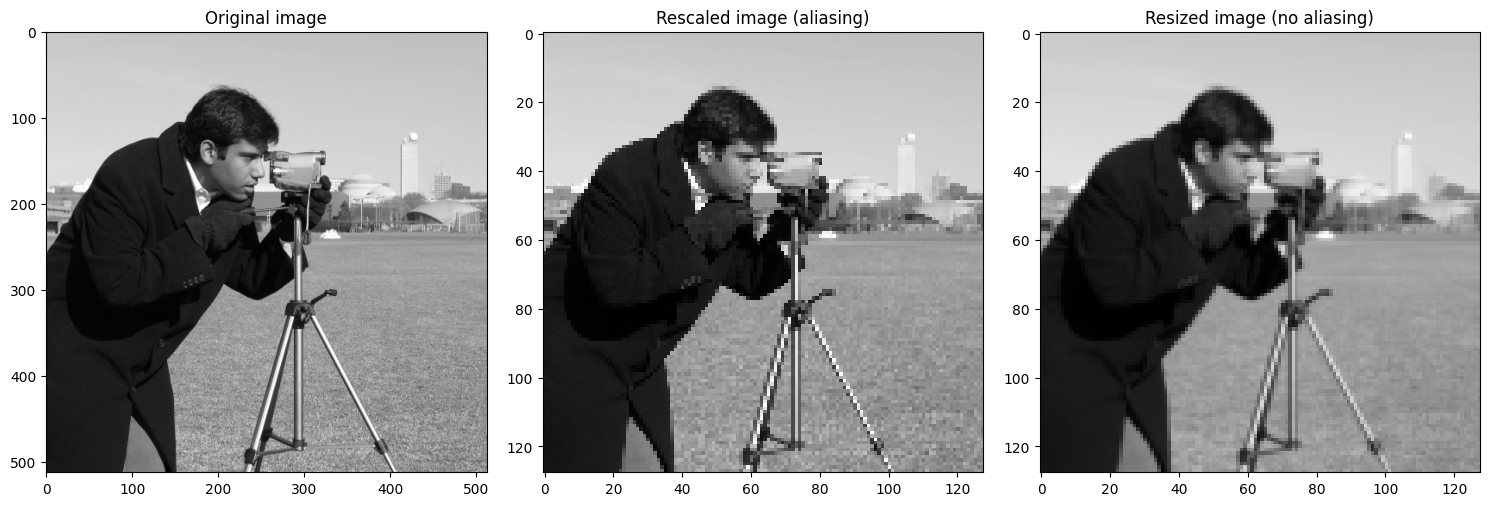

In [5]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.transform import rescale, resize

image = data.camera()
image_rescaled = rescale(image, 0.25, anti_aliasing=False)
image_resized = resize(image, (128, 128), anti_aliasing=True)


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,10))

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(image_rescaled, cmap='gray')
ax[1].set_title("Rescaled image (aliasing)")

ax[2].imshow(image_resized, cmap='gray')
ax[2].set_title("Resized image (no aliasing)")

ax[0].set_xlim(0, 512)
ax[0].set_ylim(512, 0)
plt.tight_layout()
plt.show()

shape: (88, 88)


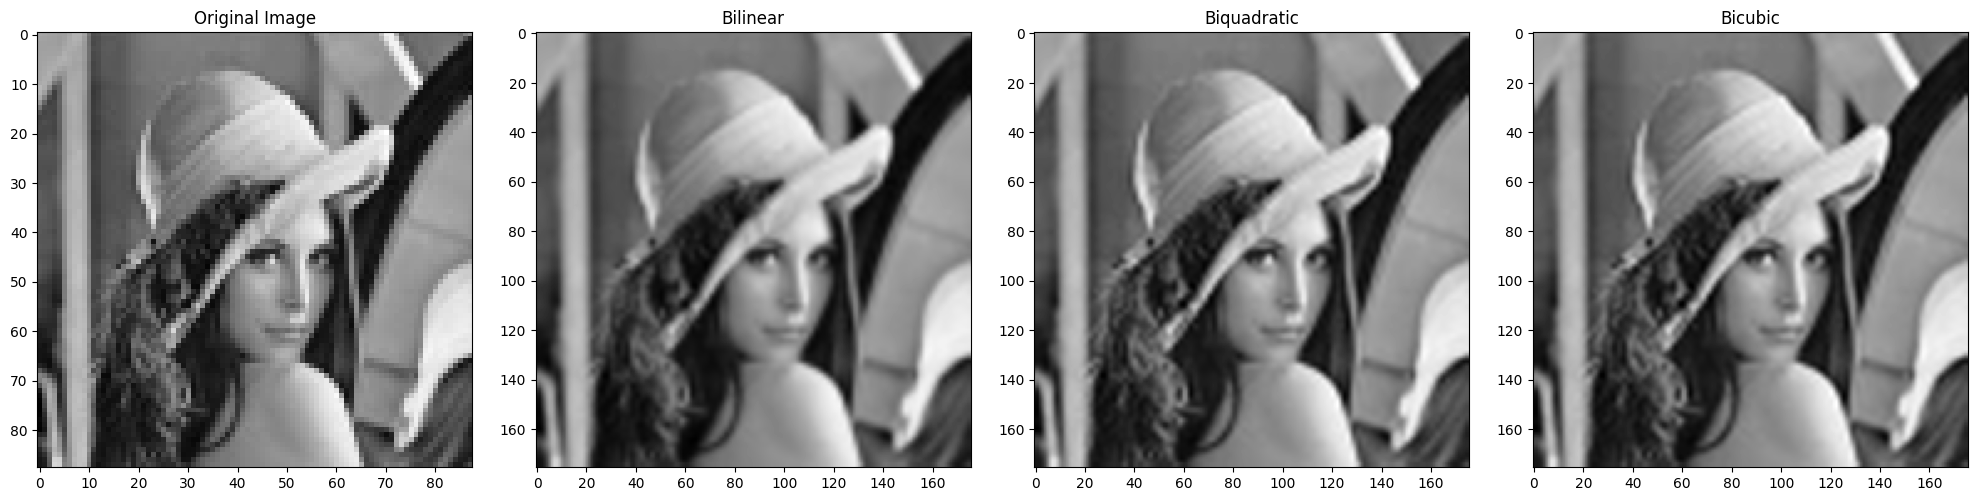

In [ ]:
import matplotlib.pyplot as plt
from skimage import data, io
#from skimage import img_as_ubyte
from skimage.transform import rescale

image = io.imread('lena.png', as_gray=True)
# image = data.cell()
image = rescale(image, 0.5)


orders = [1, 2, 3]
interpolation = ['Bilinear', 'Biquadratic', 'Bicubic']

images = [rescale(image,2, order=order) for order in orders] 

# print('original')
# print(img_as_ubyte(image))
# print('\nbilinear')
# print(img_as_ubyte(images[0]))
# print('\nbiquadratic')
# print(img_as_ubyte(images[1]))
# print('\nbicubic')
# print(img_as_ubyte(images[2]))


fig, axes = plt.subplots(nrows=1, ncols=4,
                         figsize=(20, 5),
#                        gridspec_kw={'width_ratios': [0.5,1,1,1]}
                         )
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
# ax[0].axis('off')
print(f'shape: {image.shape}')

for i, img in enumerate(images):
    ax[i+1].imshow(img, cmap='gray')
    ax[i+1].set_title(f"{interpolation[i]}")
#   ax[i+1].axis('off')

plt.tight_layout()
plt.show()


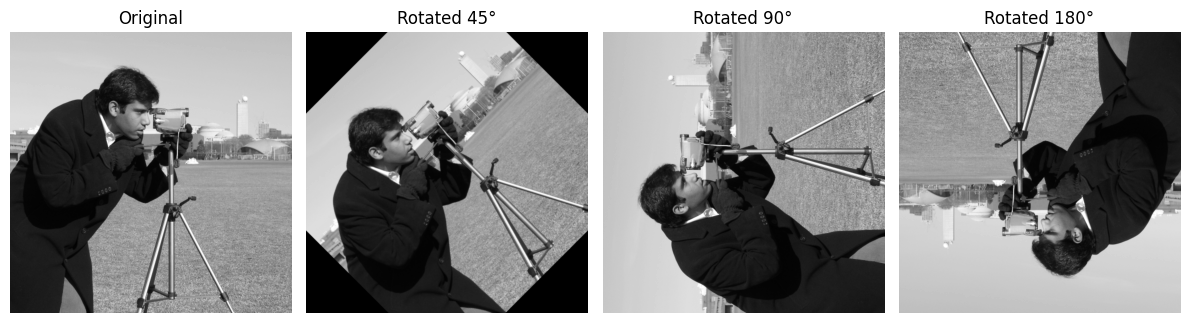

In [44]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.transform import rotate

# Load an example image
image = data.camera()

# Rotate the image by different angles
image_rotated_45 = rotate(image, angle=45)
image_rotated_90 = rotate(image, angle=90)
image_rotated_180 = rotate(image, angle=180)

# Display original and rotated images
fig, axes = plt.subplots(1, 4, figsize=(12, 6))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original")

axes[1].imshow(image_rotated_45, cmap='gray')
axes[1].set_title("Rotated 45°")

axes[2].imshow(image_rotated_90, cmap='gray')
axes[2].set_title("Rotated 90°")

axes[3].imshow(image_rotated_180, cmap='gray')
axes[3].set_title("Rotated 180°")

# Remove axes for a cleaner look
for ax in axes:
    ax.axis("off")

plt.tight_layout()
plt.show()
